In [77]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [79]:
df = pd.read_csv('data/data_train.csv', usecols = [
       'SALE PRICE','SALE DATE', 'histdist', 'landmark', 'landuse', 'YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'FELONY', 'VIOLATION', 'MISDEMEANOR',
       'Num of SAT Test Takers', 'satReadingSum', 'satMathSum',
       'satWritingSum'])
print(df.shape)
df.head()

(8885, 61)


,SALE PRICE,SALE DATE,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,easements,lotarea,...,FELONY,VIOLATION,MISDEMEANOR,Num of SAT Test Takers,satReadingSum,satMathSum,satWritingSum,histdist,landmark,landuse
0,3750000,2018-08-01 00:00:00,110,3,0,3,2018,3354,0.0,2018.0,...,462.0,195.0,869.0,3825,498.0,525.0,496.0,Mount Morris Park Historic District,NaN,2.0
1,5000000,2018-10-25 00:00:00,119,26,4,30,5060,20310,0.0,5060.0,...,306.0,156.0,677.0,4005,441.0,487.0,442.0,NaN,NaN,4.0
2,5000000,2018-10-25 00:00:00,119,26,4,30,5060,20310,0.0,5060.0,...,303.0,156.0,672.0,4005,441.0,487.0,442.0,NaN,NaN,4.0
3,29100000,2018-10-22 00:00:00,99,26,1,27,4642,27141,0.0,4642.0,...,509.0,266.0,897.0,3825,498.0,525.0,496.0,NaN,NaN,4.0
4,2350000,2019-02-11 00:00:00,116,0,0,0,0,0,0.0,10013.0,...,102.0,21.0,83.0,9100,451.0,476.0,447.0,Upper East Side Historic District,NaN,3.0


# Preprocessing

## Inspection

In [4]:
sale_price = sorted(df['SALE PRICE'])

(array([8.687e+03, 9.000e+01, 2.100e+01, 1.200e+01, 2.000e+01, 2.000e+00,
        3.000e+00, 7.000e+00, 1.400e+01, 5.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 1.96000010e+07, 3.92000010e+07, 5.88000009e+07,
        7.84000009e+07, 9.80000009e+07, 1.17600001e+08, 1.37200001e+08,
        1.56800001e+08, 1.76400001e+08, 1.96000001e+08, 2.15600001e+08,
        2.35200001e+08, 2.54800001e+08, 2.74400001e+08, 2.94000001e+08,
        3.13600001e+08, 3.33200001e+08, 3.52800001e+08, 3.72400001e+08,
        3.920000

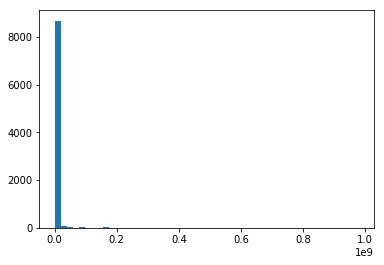

In [5]:
plt.hist(sale_price, bins=50)

### Extremum filter

https://en.wikipedia.org/wiki/List_of_probability_distributions  
out of 2 std: 95.45%  
out of 3 std: 99.73%  


In [6]:
import statistics

In [7]:
# https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python
median = statistics.median(sale_price)
median

825000

(array([ 62.,  20.,  14.,  10.,  19.,  25.,  15.,  19.,  22.,  40.,  13.,
         30.,   4.,  10.,   5.,   7.,  10.,   2.,  21.,  28.,  38.,  30.,
         70.,  53.,  77.,  84.,  88.,  73.,  96., 121.,  99., 102.,  59.,
         91.,  94.,  69., 105., 133., 134.,  93.,  92., 123., 107., 134.,
        143.,  96.,  86., 155.,  86., 148.,  77., 112., 138., 143.,  96.,
        190.,  92.,  63., 149.,  69.,  67.,  75., 100.,  60.,  52.,  68.,
         67.,  41.,  47.,  61.,  66.,  68.,  71., 131.,  20.,  62.,  22.,
         38.,  16.,  37., 114.,  11.,  16.,  16.,  47.,  14.,  52.,  29.,
         70.,  17.,  29.,  38.,  17.,  24.,  20.,  41.,  11.,  26.,  23.,
         51.]),
 array([1.00000000e+00, 1.36009900e+04, 2.72009800e+04, 4.08009700e+04,
        5.44009600e+04, 6.80009500e+04, 8.16009400e+04, 9.52009300e+04,
        1.08800920e+05, 1.22400910e+05, 1.36000900e+05, 1.49600890e+05,
        1.63200880e+05, 1.76800870e+05, 1.90400860e+05, 2.04000850e+05,
        2.17600840e+05, 2.3120

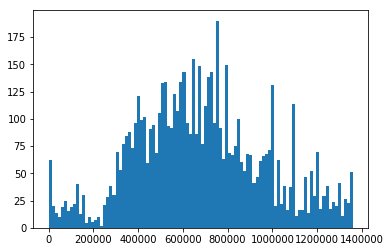

In [8]:
# filter 30% of the right side
percent = 0.3
sale_price_percent = sale_price[0:int(len(sale_price)*(1-percent))]
plt.hist(sale_price_percent, bins=100)


In [9]:
percent_right = 0.9973
percent_right = 0.9545
percent_left = len(list(filter(lambda x: x<200000, sale_price)))/len(sale_price)
percent_left

0.03421496904895892

(array([132., 484., 660., 764., 772., 901., 612., 393., 440., 244., 250.,
        187., 188., 159., 153., 145.,  94.,  98.,  77.,  90.,  63.,  70.,
         52.,  81.,  59.,  35.,  47.,  35.,  52.,  39.,  34.,  22.,  35.,
         19.,  24.,  24.,  20.,  19.,  24.,  23.,  24.,  17.,  19.,  27.,
          9.,  12.,  12.,   9.,  13.,   4.,   6.,  20.,   9.,  14.,  15.,
         10.,  14.,   7.,   5.,  10.,   4.,  10.,  15.,   7.,  16.,   7.,
          1.,  11.,   9.,  10.,  13.,   5.,  21.,   5.,   9.,   3.,   9.,
          9.,   5.,   2.,  10.,   4.,   8.,  10.,   4.,   4.,   7.,   5.,
          8.,   5.,   7.,   4.,   6.,   9.,   3.,   4.,   8.,   4.,  13.,
          6.]),
 array([ 200000.,  294000.,  388000.,  482000.,  576000.,  670000.,
         764000.,  858000.,  952000., 1046000., 1140000., 1234000.,
        1328000., 1422000., 1516000., 1610000., 1704000., 1798000.,
        1892000., 1986000., 2080000., 2174000., 2268000., 2362000.,
        2456000., 2550000., 2644000., 2738000.

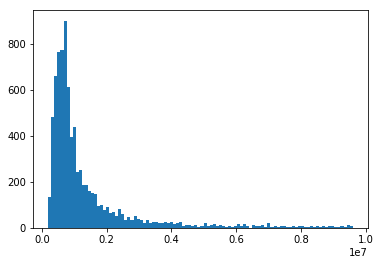

In [10]:
sale_price_percent = sale_price[int(len(sale_price) * percent_left):int(len(sale_price) * percent_right)] 
plt.hist(sale_price_percent, bins=100)

(array([  4.,   6.,   4.,   8.,   1.,  12.,  11.,  26.,  32.,  29.,  52.,
         37.,  67.,  56., 102.,  77.,  89., 155.,  95., 125., 106.,  96.,
        116., 157., 191., 153., 135., 256., 186., 173., 216., 237., 242.,
        264., 283., 222., 179., 182., 174., 109., 181., 215., 131.,  65.,
        149., 128., 118., 106.,  83., 143.,  74.,  83., 101.,  98., 102.,
         79.,  85.,  70.,  69.,  70.,  60.,  67.,  51.,  47.,  77.,  60.,
         49.,  40.,  50.,  59.,  35.,  23.,  53.,  38.,  26.,  25.,  40.,
         32.,  38.,  31.,  23.,  13.,  20.,  29.,  29.,  26.,  18.,  19.,
         27.,  25.,  21.,  38.,  18.,  23.,  16.,  25.,  20.,  18.,  21.,
         31.]),
 array([12.20607265, 12.24478466, 12.28349667, 12.32220868, 12.36092069,
        12.3996327 , 12.43834471, 12.47705672, 12.51576873, 12.55448074,
        12.59319275, 12.63190476, 12.67061677, 12.70932878, 12.74804079,
        12.7867528 , 12.82546481, 12.86417682, 12.90288883, 12.94160084,
        12.98031285, 13.01

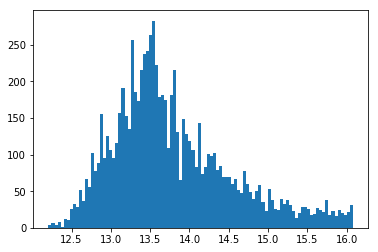

In [11]:
sale_price_percent_log = np.log(sale_price_percent)
plt.hist(sale_price_percent_log, bins=100)

(array([  4.,   6.,   4.,   8.,   1.,  12.,  11.,  26.,  32.,  29.,  52.,
         37.,  67.,  56., 102.,  77.,  89., 155.,  95., 125., 106.,  96.,
        116., 157., 191., 153., 135., 256., 186., 173., 216., 237., 242.,
        264., 283., 222., 179., 182., 174., 109., 181., 215., 131.,  65.,
        149., 128., 118., 106.,  83., 143.,  74.,  83., 101.,  98., 102.,
         79.,  85.,  70.,  69.,  70.,  60.,  67.,  51.,  47.,  77.,  60.,
         49.,  40.,  50.,  59.,  35.,  23.,  53.,  38.,  26.,  25.,  40.,
         32.,  38.,  31.,  23.,  13.,  20.,  29.,  29.,  26.,  18.,  19.,
         27.,  25.,  21.,  38.,  18.,  23.,  16.,  25.,  20.,  18.,  21.,
         31.]),
 array([5.30103   , 5.31784241, 5.33465482, 5.35146723, 5.36827965,
        5.38509206, 5.40190447, 5.41871688, 5.43552929, 5.45234171,
        5.46915412, 5.48596653, 5.50277894, 5.51959136, 5.53640377,
        5.55321618, 5.57002859, 5.58684101, 5.60365342, 5.62046583,
        5.63727824, 5.65409066, 5.67090307, 5.

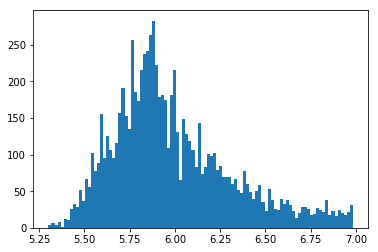

In [12]:
sale_price_percent_log = np.log10(sale_price_percent)
plt.hist(sale_price_percent_log, bins=100)

In [13]:
def standardize(df):
    return (df-df.mean())/df.std()

In [14]:
sale_price_percent_standardize = standardize(pd.DataFrame(sale_price_percent))

(array([132., 484., 660., 764., 772., 901., 612., 393., 440., 244., 250.,
        187., 188., 159., 153., 145.,  94.,  98.,  77.,  90.,  63.,  70.,
         52.,  81.,  59.,  35.,  47.,  35.,  52.,  39.,  34.,  22.,  35.,
         19.,  24.,  24.,  20.,  20.,  23.,  23.,  24.,  17.,  19.,  27.,
          9.,  12.,  12.,   9.,  13.,   4.,   6.,  20.,   9.,  14.,  15.,
         10.,  14.,   7.,   5.,  10.,   4.,  10.,  15.,   7.,  16.,   7.,
          1.,  11.,   9.,  10.,  13.,   5.,  21.,   5.,   9.,   3.,   9.,
          9.,   5.,   2.,  10.,   4.,   8.,  10.,   4.,   4.,   7.,   5.,
          8.,   5.,   7.,   4.,   6.,   9.,   3.,   4.,   8.,   4.,  13.,
          6.]),
 array([-0.76953487, -0.70904996, -0.64856505, -0.58808014, -0.52759523,
        -0.46711031, -0.4066254 , -0.34614049, -0.28565558, -0.22517067,
        -0.16468575, -0.10420084, -0.04371593,  0.01676898,  0.07725389,
         0.13773881,  0.19822372,  0.25870863,  0.31919354,  0.37967846,
         0.44016337,  0.50

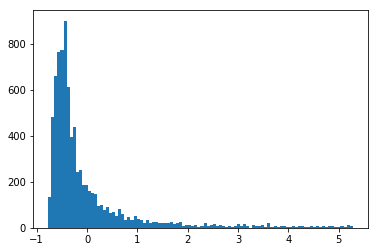

In [15]:
plt.hist(sale_price_percent_standardize[0], bins=100)

## Gaussian distribution Test


**setting a significance threshold : alpha = 0.05**

In [16]:
alpha = 0.05

**declaring the null hypothesis**  
Null Hypothesis: the vairiable sample for the feature is drawn from a Gaussian distribution, p-value 0.05

### testing

**Note** this can be answered with a KS test, in which case the data has to be standardized, or with an Anderson Darling test.
### KS test

In [17]:
import scipy as sp
from scipy import stats

In [18]:
p = sp.stats.kstest((sale_price_percent - np.mean(sale_price_percent))/
                np.std(sale_price_percent), "norm")[1]
print(p)
if p > alpha:
    print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)

0.0
we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


In [19]:
p = sp.stats.kstest((sale_price_percent_log - np.mean(sale_price_percent_log))/
                np.std(sale_price_percent_log), "norm")[1]
print(p)
if p > alpha:
    print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)

5.332536676466759e-80
we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


### AD test

In [20]:
ad = sp.stats.anderson(sale_price_percent, "norm")
if ad[0] < ad[1][ad[2] == int(alpha * 100)]:
     print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)


we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


In [21]:
ad = sp.stats.anderson(sale_price_percent_log, "norm")
if ad[0] < ad[1][ad[2] == int(alpha * 100)]:
     print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)


we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


### other test

In [22]:
sp.stats.gamma(sale_price_percent)

In [23]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.chisquare.html
sp.stats.chisquare(sale_price_percent)

Power_divergenceResult(statistic=14144345406.356565, pvalue=0.0)

In [24]:
sp.stats.chisquare(sale_price_percent_log)

Power_divergenceResult(statistic=151.88706516847873, pvalue=1.0)